#### PAIR PROGRAMMING - REGRESIÓN LOGÍSTICA - EDA

In [39]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd


# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns


#  Gestión de warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

#Para desplegar todas las columnas de los dataframes
pd.options.display.max_columns = None

Para los ejercicios de pair programming de Regresión logística temdremos que buscar un dataset (al igual que hicismos en regresión lineal) que usaremosmos a lo largo de los siguientes ejercicios.

Se ruega a la hora de realizar la entrega que incluyais el conjunto de datos que hayais decidido emplear para estos ejercicios.

Objetivos:
- Buscar un conjunto de datos a analizar
  Se recomienda que el conjunto de datos a analizar tenga variables numéricas y categóricas, primando que haya más de una variable de tipo numérico.
- Explicar los datos y las variables disponibles en el conjunto de datos seleccionado
- Realizar un EDA sencillo poniendo en práctica los conocimientos adquiridos hasta el momento.
- Interpretación de los resultados.

In [40]:
df = pd.read_csv('datos/Invistico_Airline.csv', index_col = 0)

In [41]:
df.reset_index(inplace=True) #con este código así conseguimos pasar la columna satisfaction del índice a una columna normal

In [42]:
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0


  - VR: satisfaction

In [43]:
#CAMBIAMOS NOMBRE A LA COLUMNAS PARA HOMOGENEIZAR

columnas_nuevas = {col:col.lower().replace(" ", "_") for col in df.columns}
df.rename(columns = columnas_nuevas, inplace=True)

In [44]:
df.head(1)

,satisfaction,gender,customer_type,age,type_of_travel,class,flight_distance,seat_comfort,departure/arrival_time_convenient,food_and_drink,gate_location,inflight_wifi_service,inflight_entertainment,online_support,ease_of_online_booking,on-board_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,departure_delay_in_minutes,arrival_delay_in_minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0


In [45]:
def df_explore(dataframe):
    print(
        f"El dataframe tiene {dataframe.shape[0]} filas y {dataframe.shape[1]} columnas")
    print("--------------")
    print(f"El dataframe tiene las siguientes columnas:")
    for col in dataframe.columns:
        print(col)
    print("--------------")
    print(f"Los principales estadísticos de las variables numéricas son:")
    display(dataframe.describe().T)
    print("--------------")
    print(f"Los principales estadísticos de las variables categóricas son:")
    display(dataframe.describe(include='object').T)
    print("--------------")
    print("El porcentaje de nulos por columna:")
    for i, col in enumerate(dataframe.isnull().sum()):
        print(
            f"{dataframe.isnull().sum().index[i]}: {col/dataframe.shape[0]*100}")
    print("--------------")
    print(f"Hay {dataframe.duplicated().sum()} filas duplicadas.")
    print("--------------")
    print("A continuación el resultado del método .info():")
    dataframe.info()

In [46]:
df_explore(df)

El dataframe tiene 129880 filas y 23 columnas
--------------
El dataframe tiene las siguientes columnas:
satisfaction
gender
customer_type
age
type_of_travel
class
flight_distance
seat_comfort
departure/arrival_time_convenient
food_and_drink
gate_location
inflight_wifi_service
inflight_entertainment
online_support
ease_of_online_booking
on-board_service
leg_room_service
baggage_handling
checkin_service
cleanliness
online_boarding
departure_delay_in_minutes
arrival_delay_in_minutes
--------------
Los principales estadísticos de las variables numéricas son:


,count,mean,std,min,25%,50%,75%,max
age,129880.0,39.427957,15.119360,7.0,27.0,40.0,51.0,85.0
flight_distance,129880.0,1981.409055,1027.115606,50.0,1359.0,1925.0,2544.0,6951.0
seat_comfort,129880.0,2.838597,1.392983,0.0,2.0,3.0,4.0,5.0
departure/arrival_time_convenient,129880.0,2.990645,1.527224,0.0,2.0,3.0,4.0,5.0
food_and_drink,129880.0,2.851994,1.443729,0.0,2.0,3.0,4.0,5.0
gate_location,129880.0,2.990422,1.305970,0.0,2.0,3.0,4.0,5.0
inflight_wifi_service,129880.0,3.249130,1.318818,0.0,2.0,3.0,4.0,5.0
inflight_entertainment,129880.0,3.383477,1.346059,0.0,2.0,4.0,4.0,5.0
online_support,129880.0,3.519703,1.306511,0.0,3.0,4.0,5.0,5.0
ease_of_online_booking,129880.0,3.472105,1.305560,0.0,2.0,4.0,5.0,5.0


--------------
Los principales estadísticos de las variables categóricas son:


,count,unique,top,freq
satisfaction,129880,2,satisfied,71087
gender,129880,2,Female,65899
customer_type,129880,2,Loyal Customer,106100
type_of_travel,129880,2,Business travel,89693
class,129880,3,Business,62160


--------------
El porcentaje de nulos por columna:
satisfaction: 0.0
gender: 0.0
customer_type: 0.0
age: 0.0
type_of_travel: 0.0
class: 0.0
flight_distance: 0.0
seat_comfort: 0.0
departure/arrival_time_convenient: 0.0
food_and_drink: 0.0
gate_location: 0.0
inflight_wifi_service: 0.0
inflight_entertainment: 0.0
online_support: 0.0
ease_of_online_booking: 0.0
on-board_service: 0.0
leg_room_service: 0.0
baggage_handling: 0.0
checkin_service: 0.0
cleanliness: 0.0
online_boarding: 0.0
departure_delay_in_minutes: 0.0
arrival_delay_in_minutes: 0.3025870033877425
--------------
Hay 0 filas duplicadas.
--------------
A continuación el resultado del método .info():
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   gender                   

In [47]:
for col in df.columns:
   print(f"Los valores únicos de {col} son:")
   print(df[col].unique())
   print(".......")

Los valores únicos de satisfaction son:
['satisfied' 'dissatisfied']
.......
Los valores únicos de gender son:
['Female' 'Male']
.......
Los valores únicos de customer_type son:
['Loyal Customer' 'disloyal Customer']
.......
Los valores únicos de age son:
[65 47 15 60 70 30 66 10 56 22 58 34 62 35 13 52 55 28  9 25 53 16 64 42
 21 20 26 48 57 31 17 33 32 38 29 24 37  7 39 11 49  8 40 45 67 59 44 69
 51 18 23 12 46 41 54 27 63 61 36 50 68 19 14 43 72 71 80 77 85 78 75 79
 74 73 76]
.......
Los valores únicos de type_of_travel son:
['Personal Travel' 'Business travel']
.......
Los valores únicos de class son:
['Eco' 'Business' 'Eco Plus']
.......
Los valores únicos de flight_distance son:
[ 265 2464 2138 ... 5832 5120 4260]
.......
Los valores únicos de seat_comfort son:
[0 1 4 5 2 3]
.......
Los valores únicos de departure/arrival_time_convenient son:
[0 1 2 3 4 5]
.......
Los valores únicos de food_and_drink son:
[0 1 2 3 4 5]
.......
Los valores únicos de gate_location son:
[2 3 4 1 5

In [48]:
df_num = df.select_dtypes(include=np.number)
df_num.head()

,age,flight_distance,seat_comfort,departure/arrival_time_convenient,food_and_drink,gate_location,inflight_wifi_service,inflight_entertainment,online_support,ease_of_online_booking,on-board_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,departure_delay_in_minutes,arrival_delay_in_minutes
0,65,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,47,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,15,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,60,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,70,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0


In [49]:
def similar_variables(lista_variables,plot = True):
    for columna in lista_variables:
        print(' Los valores únicos para la variable',columna, 'son:', list( df_num[columna].unique()))
        value_counts = df_num[columna].value_counts()
        if plot == True:
            plt.figure()
            value_counts.plot.pie(figsize=(8,8))
        else:
            pass

In [50]:
lista_col = ['online_support', 'online_boarding']

 Los valores únicos para la variable online_support son: [2, 3, 4, 5, 1, 0]
 Los valores únicos para la variable online_boarding son: [2, 3, 5, 4, 1, 0]


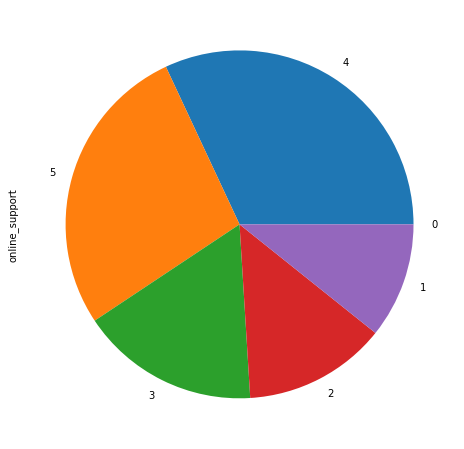

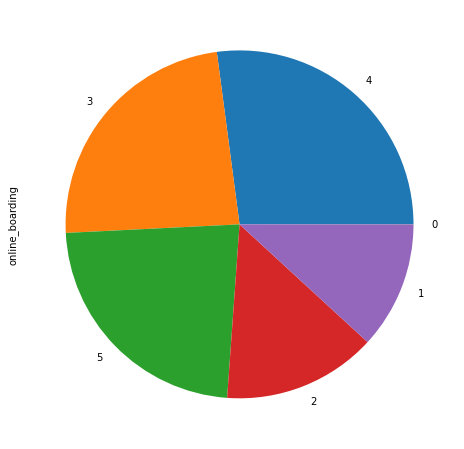

In [51]:
#Intentamos ver si las variables online_support y online_boarding son similares o contienen la misma información. NO obstante, después de obtener los gráficos, vemos que no se trata de la misma información
similar_variables(lista_col) 

In [52]:
df_cat= df.select_dtypes(include = 'object')
df_cat.head()

,satisfaction,gender,customer_type,type_of_travel,class
0,satisfied,Female,Loyal Customer,Personal Travel,Eco
1,satisfied,Male,Loyal Customer,Personal Travel,Business
2,satisfied,Female,Loyal Customer,Personal Travel,Eco
3,satisfied,Female,Loyal Customer,Personal Travel,Eco
4,satisfied,Female,Loyal Customer,Personal Travel,Eco


In [53]:
for i in df_cat.columns:
    df_cat[i] = df_cat[i].astype("category")

In [54]:
df_cat.dtypes

satisfaction      category
gender            category
customer_type     category
type_of_travel    category
class             category
dtype: object

- ANÁLISIS EXPLOTARIO CON GRÁFICAS

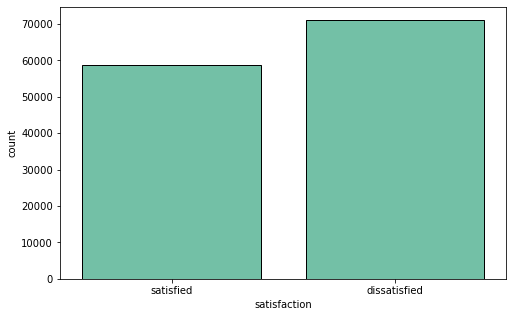

In [55]:
# sacamos un countplot de la VR para conocer la satisfaccion de los clientes en general

plt.figure(figsize=(8,5)) 

fig1 = sns.countplot(data = df_cat, x = "satisfaction",  color = "mediumaquamarine",  edgecolor='black')
fig1.set(xticklabels=["satisfied", "dissatisfied"]) 
plt.show();

In [56]:
df_cat["satisfaction"].value_counts() / df_cat.shape[0] *100

satisfied       54.73283
dissatisfied    45.26717
Name: satisfaction, dtype: float64

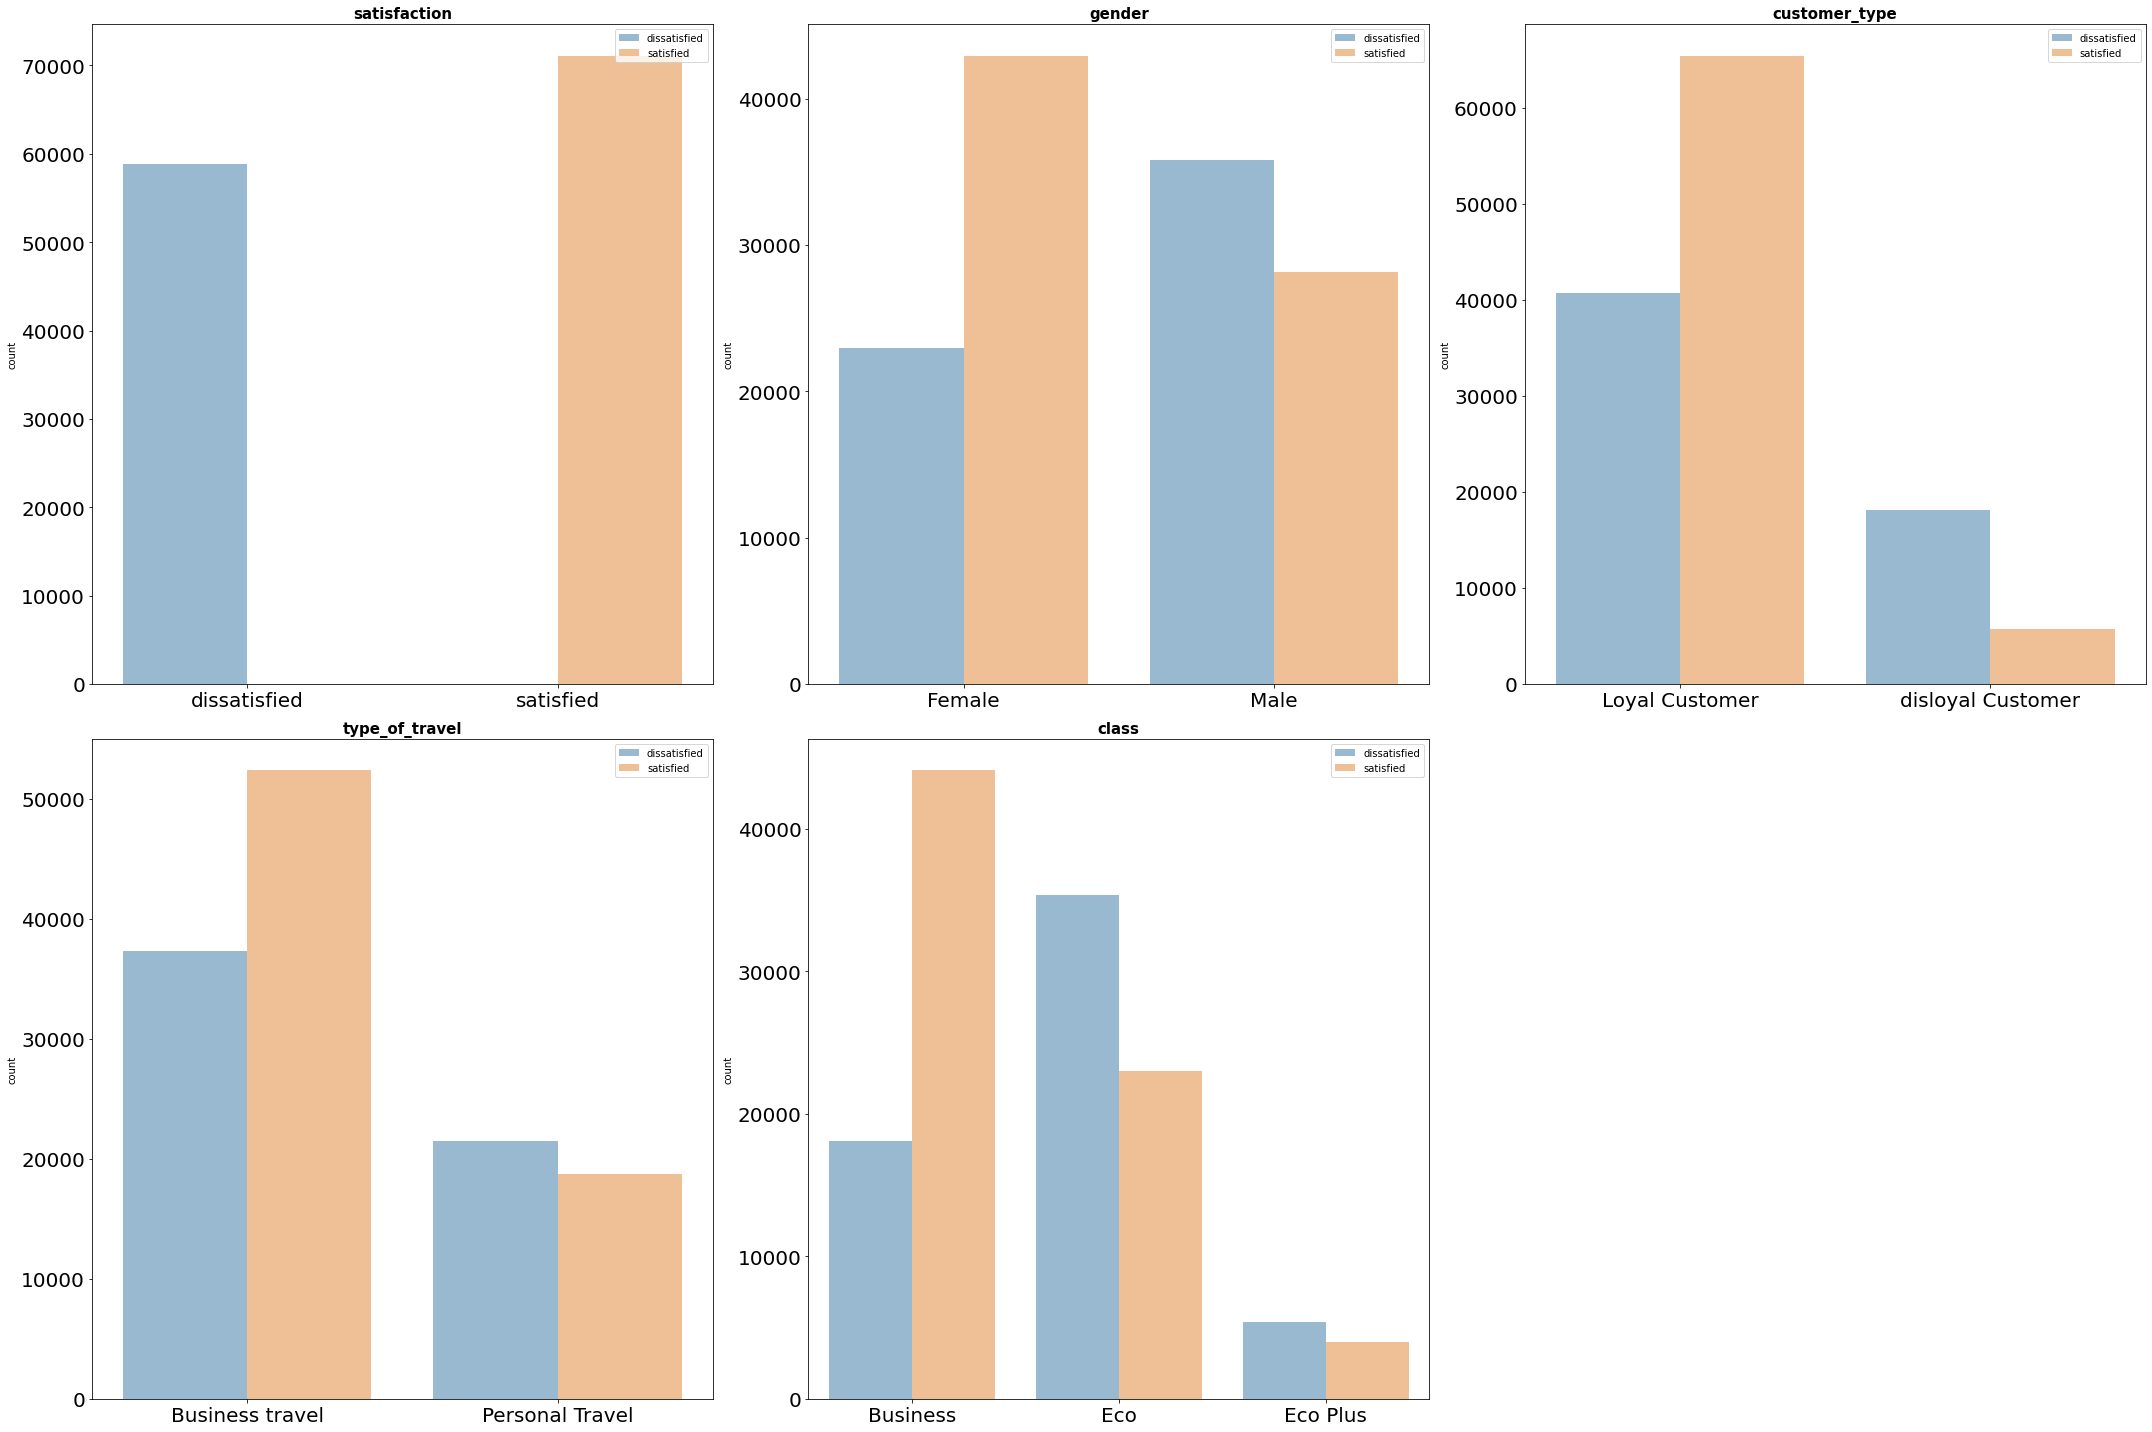

In [57]:
# Gráfico de distribución para cada variable categórica
# ==============================================================================

fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (30, 20))

axes = axes.flat

for i, colum in enumerate(df_cat): 
    sns.countplot(
        data = df_cat,
        x = colum,
        hue = "satisfaction",
        alpha = 0.5, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].legend(loc= "upper right")
    
fig.delaxes(axes[-1])
fig.tight_layout();

In [58]:
# hemos observado que varias de nuestras variables numericas no son numericas reales, sino catégoricas, por lo que hemos hecho un filtado
# de las numéricas reales

numericas_reales=  df_num.filter(items = ["age", "flight_distance", "arrival_delay_in_minutes", "departure_delay_in_minutes"])

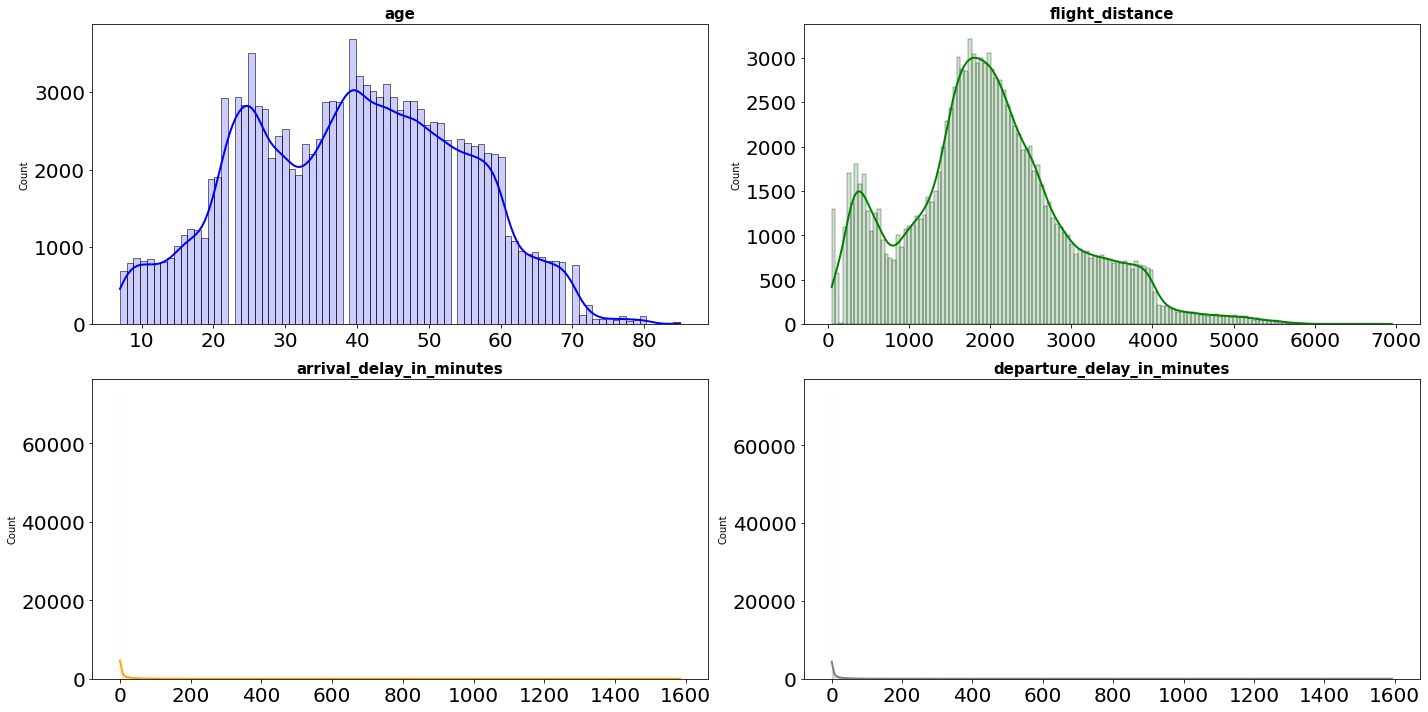

In [59]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (20, 10))

lista_colores = ["blue", "green", "orange", "grey"]

axes = axes.flat

for i, colum in enumerate(numericas_reales): 
    sns.histplot(
        data = numericas_reales,
        x = colum,
        kde = True, 
        color = lista_colores[i], 
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")

#plt.xlim([25, 50])
fig.tight_layout();

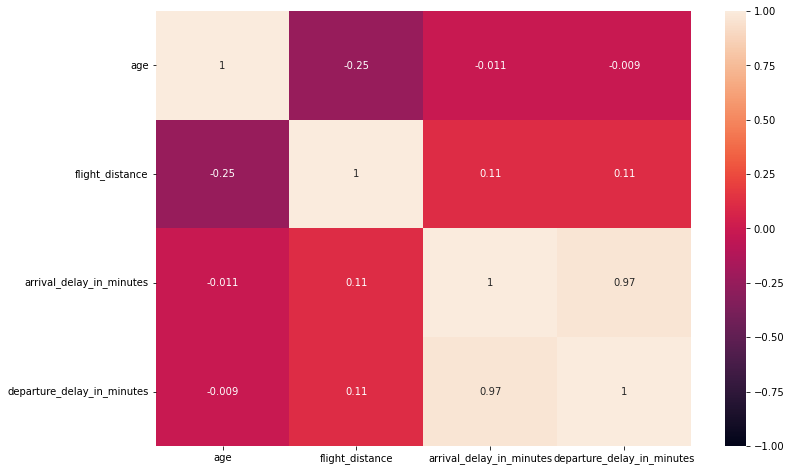

In [60]:
plt.figure(figsize= (12,8))
sns.heatmap(numericas_reales.corr(),
            annot = True,
            vmin = -1,
            vmax= 1);

In [61]:
correlacion = df_num.corr()

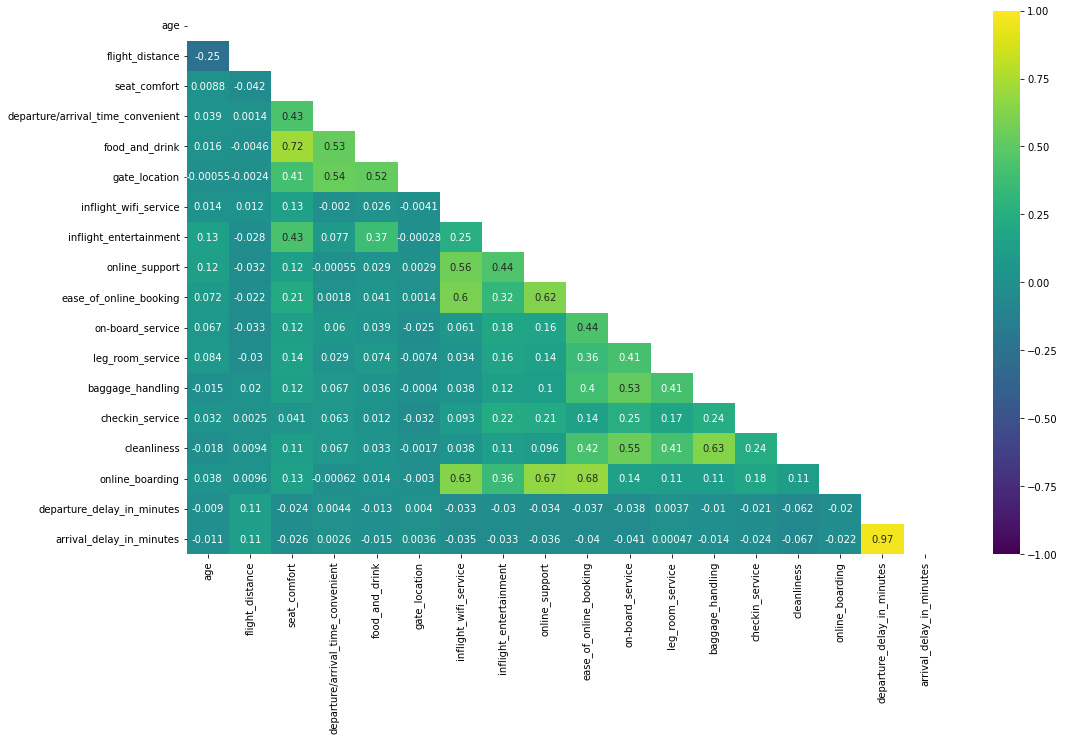

In [62]:
plt.figure(figsize=(17,10))
mask = np.triu(np.ones_like( correlacion, dtype=bool))
sns.heatmap(correlacion, cmap="viridis", annot = True, mask = mask, vmin = -1, vmax = 1); #barra lateral

In [63]:
#viendo la alta correlación de las dos variables que hay en minutos, decidimos eliminar una de ellas: arrival_delay_in_minutes y food_and_drink

df.drop(['arrival_delay_in_minutes', 'food_and_drink'], axis = 1, inplace = True)

In [64]:
# decidimos eliminarlas también de nuestro df_num

df_num.drop(['arrival_delay_in_minutes', 'food_and_drink'], axis = 1, inplace = True)

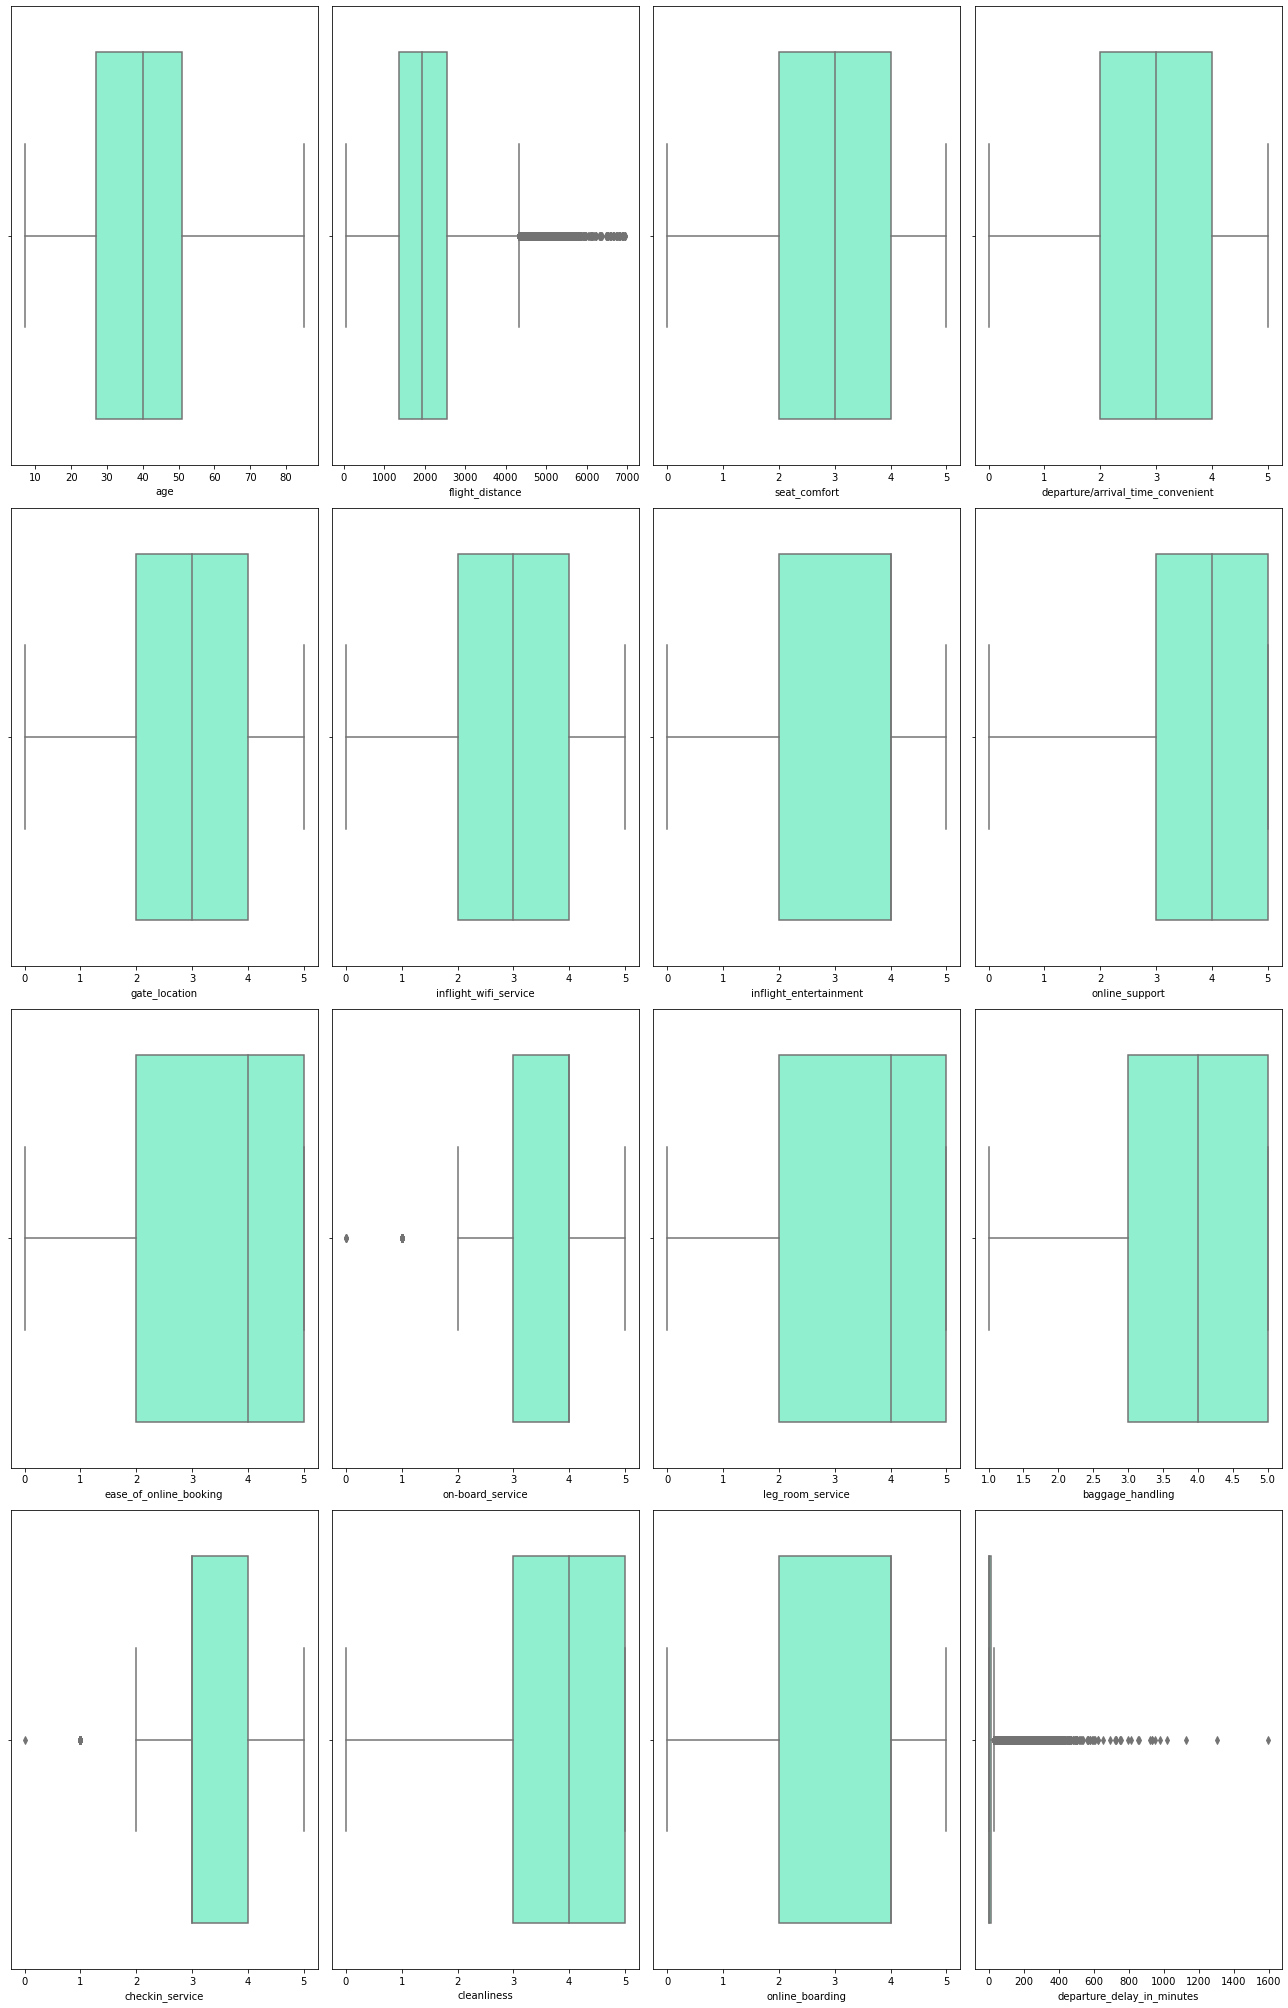

In [65]:
fig, axes = plt.subplots(4, 4, figsize=(18,28))

axes = axes.flat

for indice, columna in enumerate(df_num.columns):
    sns.boxplot(x = df_num[columna], data = df_num, ax=axes[indice], color = "aquamarine"); # para trazar una línea de densidad

    
plt.tight_layout()
plt.show()

In [66]:
def detectar_outliers(lista_columnas, dataframe): 
    
    dicc_indices = {} # creamos un diccionario donde almacenaremos índices de los outliers
    
    # iteramos por la lista de las columnas numéricas de nuestro dataframe
    for col in lista_columnas:
        
        #calculamos los cuartiles Q1 y Q3
        Q1 = np.nanpercentile(dataframe[col], 25)
        Q3 = np.nanpercentile(dataframe[col], 75)
        
        # calculamos el rango intercuartil
        IQR = Q3 - Q1
        
        # calculamos los límites
        outlier_step = 1.5 * IQR
        
        # filtramos nuestro dataframe para indentificar los outliers
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        
        
        if outliers_data.shape[0] > 0: # chequeamos si nuestro dataframe tiene alguna fila. 
        
            dicc_indices[col] = (list(outliers_data.index)) # si tiene fila es que hay outliers y por lo tanto lo añadimos a nuestro diccionario
        

    
    return dicc_indices 

In [67]:
lista_columnas = list(df_num.columns)

ind = detectar_outliers(lista_columnas, df_num)

In [68]:
# en que columnas nos hemos encontrado outliers

ind.keys()

dict_keys(['flight_distance', 'on-board_service', 'checkin_service', 'departure_delay_in_minutes'])

In [69]:
df.head()

,satisfaction,gender,customer_type,age,type_of_travel,class,flight_distance,seat_comfort,departure/arrival_time_convenient,gate_location,inflight_wifi_service,inflight_entertainment,online_support,ease_of_online_booking,on-board_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,departure_delay_in_minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,2,2,4,2,3,3,0,3,5,3,2,0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,3,0,2,2,3,4,4,4,2,3,2,310
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,3,2,0,2,2,3,3,4,4,4,2,0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,3,3,4,3,1,1,0,1,4,1,3,0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,3,4,3,4,2,2,0,2,4,2,5,0


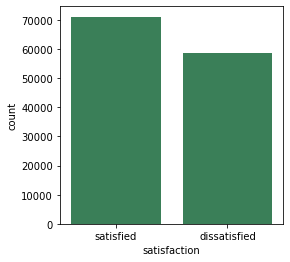

In [70]:
# variable respuesta

plt.figure(figsize=(4,4))

fig = sns.countplot(data = df, x = "satisfaction",  color = "seagreen")
plt.show();

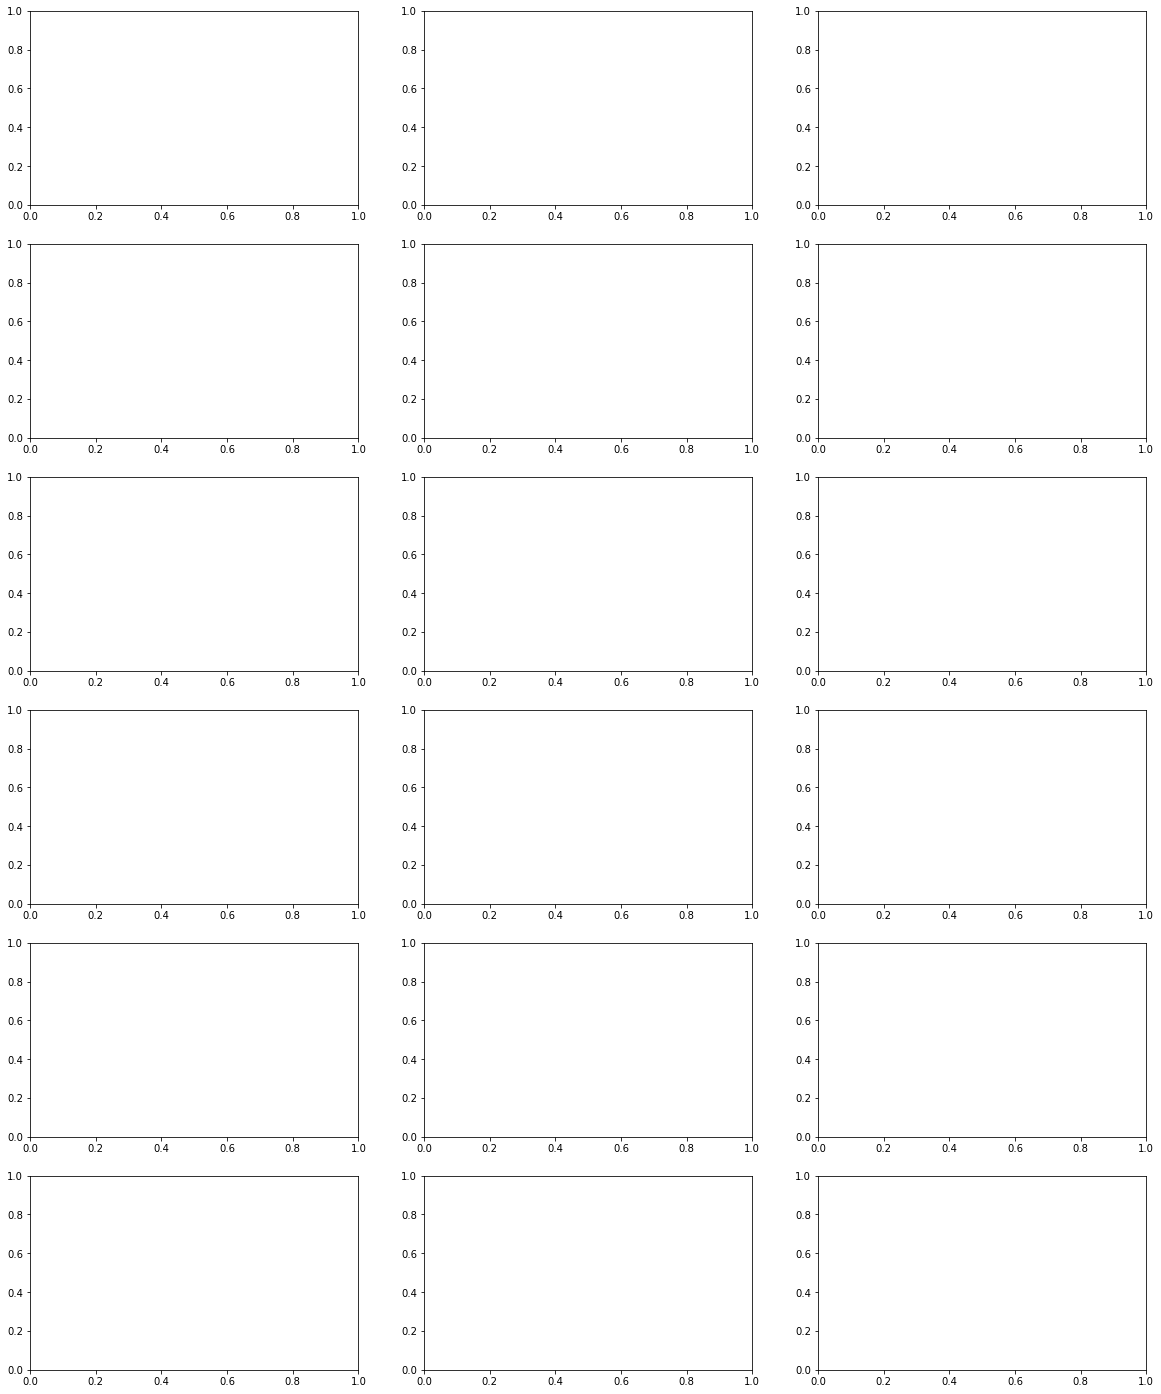

In [71]:
# Distribución variables categóricas

fig, axes = plt.subplots(nrows = 6, ncols = 3, figsize = (20, 25))

axes = axes.flat
df_cat = df.select_dtypes(include = "category").columns

for i, colum in enumerate(df_cat): 
    sns.countplot(data = df, x = colum, hue = "satisfaction", alpha = 0.7, ax = axes[i], palette = "rocket")    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "light")
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")
    axes[i].legend(loc= "upper right")